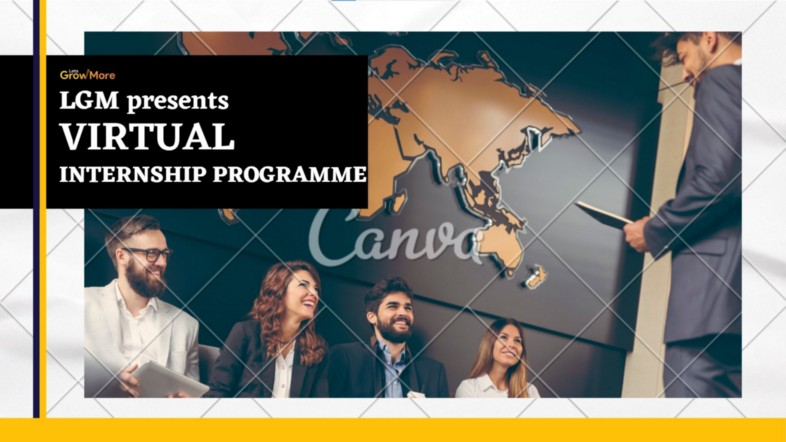

# <center><font color="red"> Virtual Internship Program
# <center><font color="blue">Author :- Ayesha Bashir
# <center><font color="blue">Beginer Level Tasks


# Task- 2 Stock Market Prediction And Forecasting Using Stacked LSTM
#### Dataset Link -: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv



### 1. Importing The Libraries

In [12]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [13]:

import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error
print(" All required packages included successfully!")


 All required packages included successfully!


### 2. Importing The dataset


In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df=df. iloc[::-1]
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [14]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


### 3. Data Preprocessing


In [15]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [17]:
df.shape


(2035, 8)

In [18]:
df_high=df.reset_index()['High']

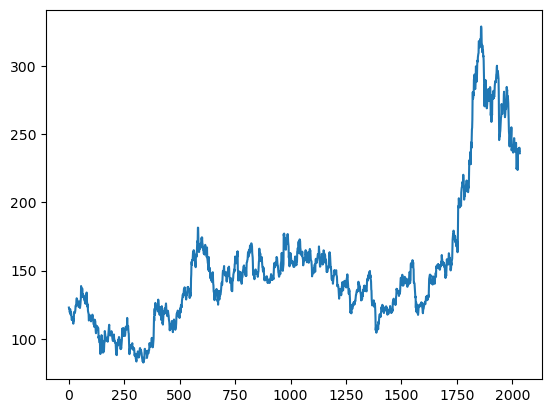

In [19]:
plt.plot(df_high)

In [20]:
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))


In [21]:

df_high.shape

(2035, 1)

In [22]:
df_high


array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [23]:

#Split the data into train and test split
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]


In [24]:
training_size,test_size

(1526, 509)

In [29]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)


In [30]:

time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [31]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [32]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [33]:
print(x_test.shape), print(y_test.shape)


(408, 100, 1)
(408,)


(None, None)

### 4. Create The LSTM Model 

In [34]:

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [35]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)


Epoch 1/100
23/23 [==============================] - 15s 262ms/step - loss: 0.0083 - val_loss: 0.0127
Epoch 2/100
23/23 [==============================] - 5s 214ms/step - loss: 0.0017 - val_loss: 0.0069
Epoch 3/100
23/23 [==============================] - 5s 209ms/step - loss: 8.6668e-04 - val_loss: 0.0032
Epoch 4/100
23/23 [==============================] - 3s 142ms/step - loss: 8.4998e-04 - val_loss: 0.0033
Epoch 5/100
23/23 [==============================] - 4s 179ms/step - loss: 9.1631e-04 - val_loss: 0.0039
Epoch 6/100
23/23 [==============================] - 5s 218ms/step - loss: 7.5861e-04 - val_loss: 0.0028
Epoch 7/100
23/23 [==============================] - 5s 199ms/step - loss: 7.6022e-04 - val_loss: 0.0033
Epoch 8/100
23/23 [==============================] - 3s 134ms/step - loss: 6.9859e-04 - val_loss: 0.0029
Epoch 9/100
23/23 [==============================] - 5s 218ms/step - loss: 6.7757e-04 - val_loss: 0.0031
Epoch 10/100
23/23 [==============================] - 5s 214ms

In [37]:

#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)


13/13 [==============================] - 0s 29ms/step


In [38]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [39]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

136.70564266709678

In [40]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))


231.13385381885544

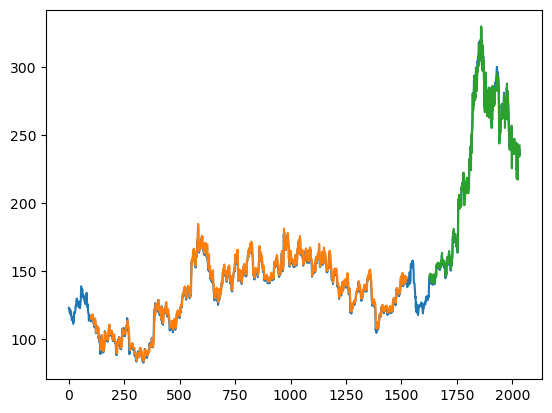

In [41]:

#Plotting
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict
#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


Green indicates the Predicted Data<br>
Blue indicates the Complete Data<br>
Orange indicates the Train Data

### 5. Predicting the next 28 days Stock Price</span

In [42]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [43]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [44]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [52]:
lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0
while(i<nextNumberOfDays):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)


[0.6235496]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0

In [54]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)


In [55]:
day_new.shape


(100,)

In [56]:
day_pred.shape


(28,)

In [57]:
df3 = df_high.tolist()
df3.extend(lst_output)

In [58]:
len(df_high)


2035

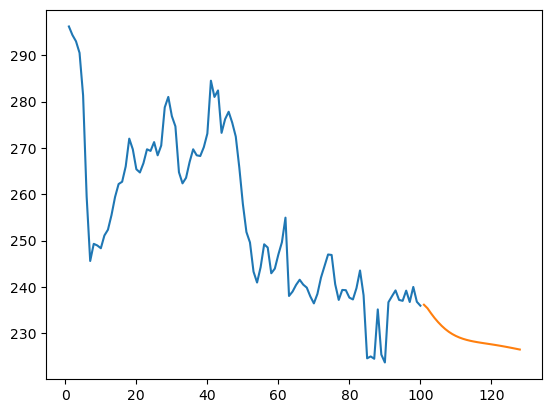

In [59]:
plt.plot(day_new, scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

In [60]:
df3=scaler.inverse_transform(df3).tolist()


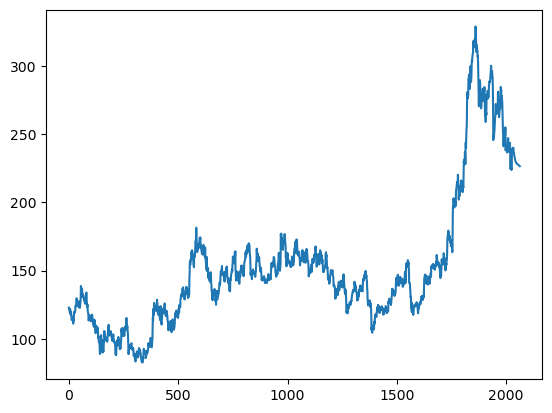

In [61]:
plt.plot(df3)

# Thank You
